In [1]:
from datascience import *
%matplotlib inline
path_data = '../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Assessing a Model (모델 평가)

Model이란?
- 어떤 사건에 대한 확률이 자연스레 이루어지는 것 (ex. 가위바위보를 시행 -> 33%의 승률을 가지는 일반적인 확률에 대해 승률이 70%인 모델과 40%인 모델 등이 존재)

### Example : 배심원 선택

100명중에 흑인의 비율은 26%가 되도록 정해져 있다. 하지만 한 심판에서 흑인 배심원은 고작 8명(8%)였다.

이들의 주장은 패널이 무작위로 선정되어서 우연히 소수의 흑인이 선정되었다는 것이다. 이를 모델 기반으로 추정해보자

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74] # 흑인 / 비흑인

In [4]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [5]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

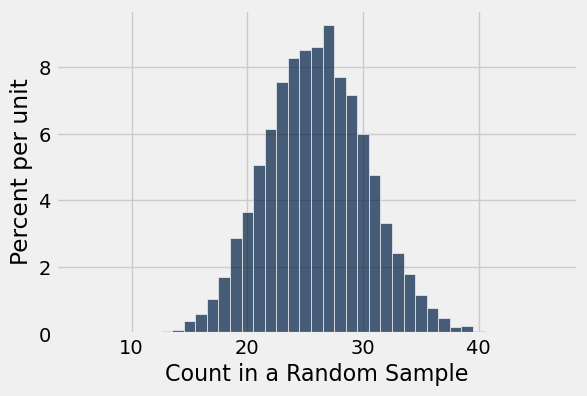

In [6]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.show()

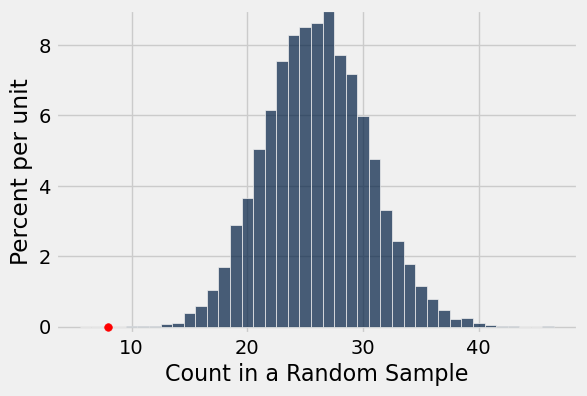

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30) # 현재 데이터의 성격(위치)
plots.show()

## 데이터 분석의 결론 ##

위 그래프는 선택 과정에서 편향을 시각적으로 보여줍니다. 적격 모집단에서 무작위로 100개 크기의 패널을 선택하면 임상시험에서 패널에서 관찰된 8명만큼 낮은 흑인 패널 수를 얻을 가능성이 매우 낮다는 것을 보여줍니다.

이는 패널의 배심원 무작위 선택 모델이 패널의 데이터와 일치하지 않는다는 증거입니다. 패널이 우연히 생성되었을 가능성은 *가능성은* 있지만, 시뮬레이션 결과 그럴 가능성은 매우 낮다는 것이 입증되었습니다.

임상시험 패널의 현실은 적격 모집단에서 무작위로 선택한다는 모델의 가정과 매우 상충됩니다. 데이터와 모델이 일치하지 않으면 모델을 정당화하기 어렵습니다. 결국 데이터는 실제입니다. 모델은 가정의 집합일 뿐입니다. 가정이 현실과 상충되는 경우 이러한 가정에 의문을 제기해야 합니다.

따라서 가장 합리적인 결론은 이 배심원 패널에 대해 무작위 선택의 가정이 부당하다는 것입니다. 즉, 가장 합리적인 결론은 적격 배심원 집단에서 무작위 표본 추출을 통해 배심원 패널이 *선택되지 않았다*는 것입니다. 대법원의 의견에도 불구하고 26%와 8%의 차이는 우연만으로 잘 설명할 수 있을 정도로 작지 않습니다.

## 통계적 편향 ##

위의 분석은 로버트 스웨인의 재판에서 불공정성에 대한 정량적 증거를 제공합니다. 이 데이터는 그가 미국 헌법에 의해 자격이 부여된 공정한 배심원단이 거부되었다는 그의 입장을 뒷받침합니다.

추가 데이터에 따르면 흑인 패널리스트의 배제가 만연해 있었습니다. 1965년에 작성된 대법원 판결문에는 "1953년 이후 배심원 상자에서 추출한 배심원 패널 중 단 10~15%만이 [흑인]이었으며, 그 비율이 23%에 달하는 경우는 단 한 건뿐이었다"는 로버트 스웨인의 증거가 포함되어 있습니다. 위 히스토그램의 가로축에서 10%와 15%가 어디에 있는지 보세요. 이러한 값은 자격이 있는 인구 중 무작위로 선택할 경우에도 매우 가능성이 낮습니다.

프로세스가 항상 예상보다 낮은 흑인 패널의 비율과 같이 한 방향으로 체계적으로 오류를 생성하면 데이터 과학자들은 프로세스가 *편향*이라고 말합니다. 이러한 편향의 정량화는 데이터 과학의 중요한 책임입니다.

이 섹션의 주장과 같은 주장은 이제 법정에서 더 자주 제기되고 있습니다. 1960년대에 대법원은 데이터를 검토했지만 "전체 비율 격차가 작았다"는 잘못된 결론을 도출했습니다. "작다"는 의미에서 대다수 법원에 단순히 합리적으로 보이는 것에 의존하는 것은 잘못된 것이었습니다. 합리적인 것에 대한 견해는 순전히 주관적일 뿐만 아니라 만연한 인종 편견의 영향에 취약했습니다. 이 사건의 주장에 이 섹션에 대한 정량적 분석이 포함되었다면 법원은 비율 격차가 작다고 결론을 내리지 않았을 수도 있습니다.

# 11.2 Multiple Categories

In [8]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


각 인종별로 배심원을 나누어야 하는 비율과 실제 뽑힌 비율을 테이블로 정리하였다.

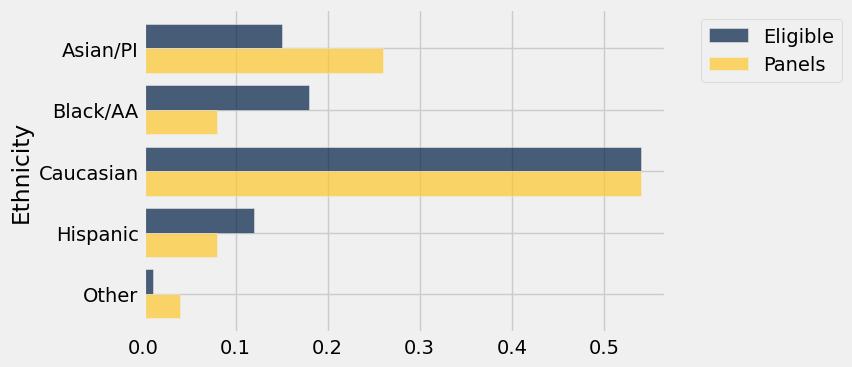

In [9]:
jury.barh('Ethnicity')
plots.show()

차이를 더 명확히 보기 위해 시각화 한 그래프

### 랜덤하게 선택된 패널들 비교

In [10]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.147281
Black/AA,0.18,0.08,0.186511
Caucasian,0.54,0.54,0.52925
Hispanic,0.12,0.08,0.126635
Other,0.01,0.04,0.0103235


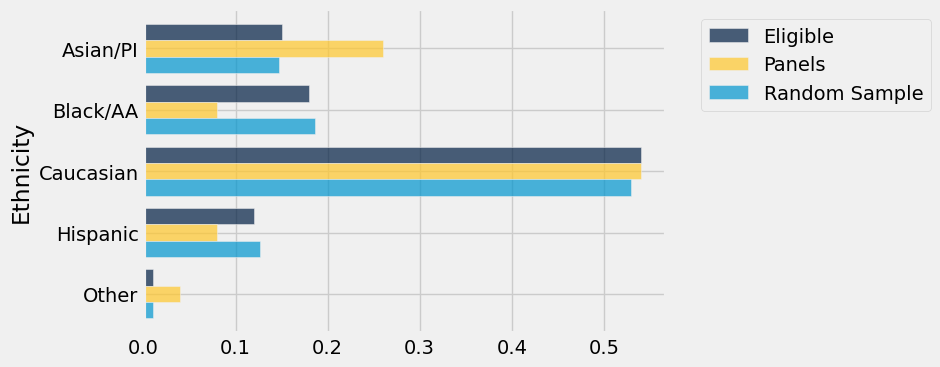

In [11]:
panels_and_sample.barh('Ethnicity')
plots.show()

In [12]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [13]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [14]:
jury_with_diffs.column('Absolute Difference').sum() / 2 # 양 방향으로 14% 씩, 즉 전체적으로 28% 차이이기 때문에 2를 나눈다. (해석 관점에서 용이)

0.14000000000000001

### 시뮬레이션

In [15]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [16]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

실제 패널과 권장 비율의 차이는 14%정도이다.

In [17]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.024101858224363386

모집단 1453개의 표본에 대해서는 2%이다

In [18]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

In [19]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

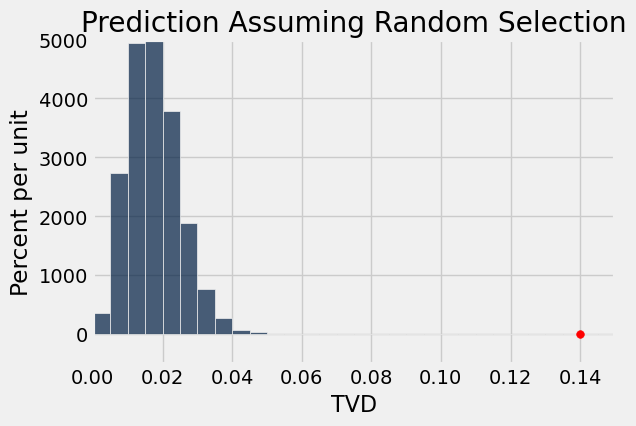

In [20]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30)
plots.show()

즉, 권장 비율대로 배심원 수를 결정하였다면 그 비중의 차이는 2% 내외일 것이다. 하지만 14%의 오차를 가진다는 것은 결코 우연이 아님을 알 수 있다.

# 11.3 Decisions and Uncertainty (결정과 불확실성)

### 멘델의 모델

모든 식물에 대해 75%는 보라 꽃, 나머지 25%에 대해서는 흰 꽃이 필 것이다.

929그루의 식물을 심었을 때 그 차이를 알아보자

### Step 1 : 가설

귀무가설 : 각 식물은 75%의 확률을 따라 보라꽃을 피울 것이다.

대립가설 : 귀무가설이 옳지 않다.

### Step 2 : 테스트 검증

이 검정 통계량은 두 분포 사이의 거리이다. 표본 비율이 약 75%이면 모델과 일치하지만, 75%보다 훨씬 크거나 훨씬 작으면 모델이 좋지 않다고 생각할 수 있다. 따라서 거리 값이 작을수록 귀무 가설에 기울게 된다. 통계량 값이 크면 대립가설에 기울게 된다.

In [21]:
observed_statistic = abs(100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

### Step 3 : 귀무가설 하에 테스트 통계의 분포

In [22]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

In [23]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [24]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

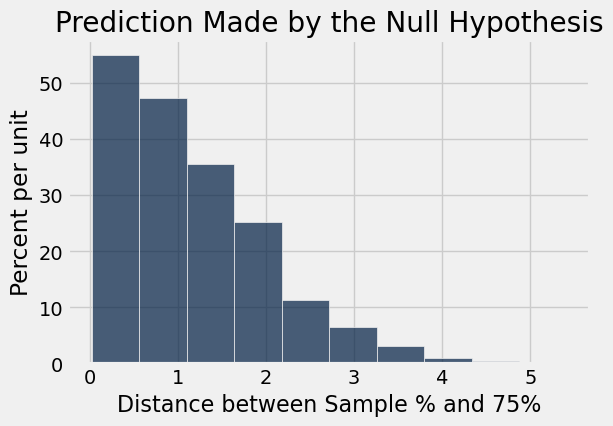

In [25]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis')
plots.show()

다음의 그림에서 알 수 있듯이, 0 ~ 1 사이의 비율이 약 50%이다. 따라서 74~76% 사이의 확률로 보라꽃을 피운다는 것을 알 수 있다.

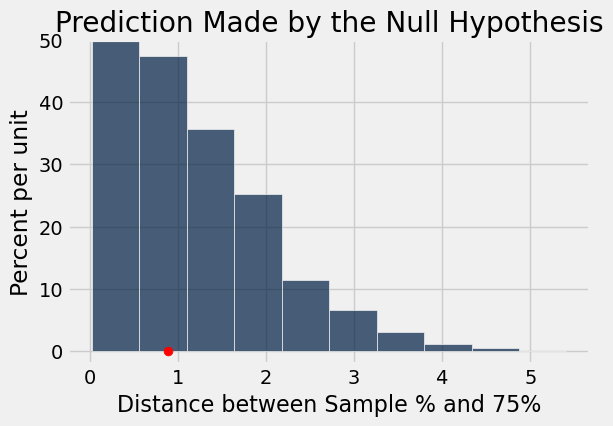

In [26]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40)
plots.show()

즉, 2단계에서 했던 검정 통계량의 값이 샘플링된 예측 분포 내에 있는 것을 확인할 수 있다. 이는 귀무 가설을 지지하는 것으로 볼 수 있다.

### 일관성의 의미

그렇다면 새로운 작물을 929종 심었을 때, 이 식물이 멘델의 모델을 따르는지 확인해보려 한다.

해당 식물은 오차 거리가 3.2로 나왔다고 가정해보자.

이는 어떻게 해석할 수 있을까?


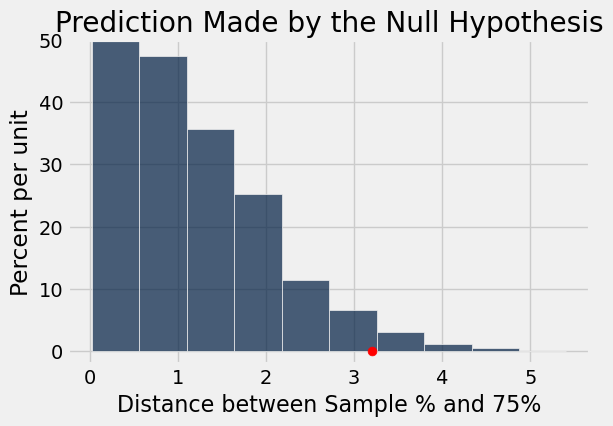

In [28]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40)
plots.show()

우리는 p-value를 통해 해석할 수 있다.

10000번 샘플링 한 결과에 대해서 3.2 이상이 나온 경우는 약 2.4% 정도이다. 이 말은 새로운 식물이 멘델 모델에 적용하였을 때 검정 통계량이 3.2 이상일 확률이 2.4%라는 말이 된다. 즉, 이는 거의 일어나지 않을 확률이라고 해석할 수 있다.

일반적으로 p-value가 5% 미만이면 작은 값으로 간주하고 그 결과는 **통계적으로 유의미한 값**이라고 한다.

# 11.4 Error Probabilities (에러 확률)

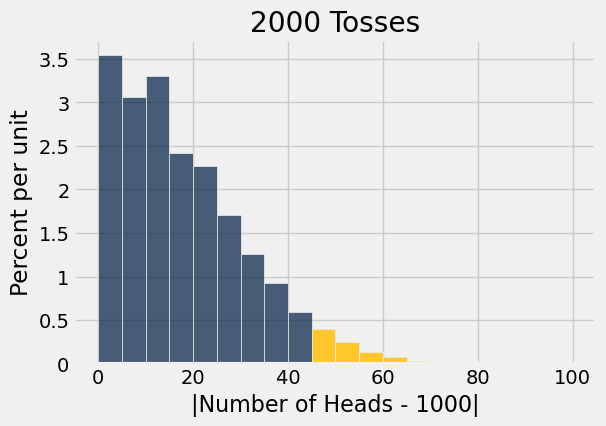

In [29]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = make_array()
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5), left_end=45) # 45회 이상
plots.title('2000 Tosses')
plots.show()

동전은 일반적으로 앞, 뒤 반반의 확률을 가진다. 2000번 던졌을 때 앞, 뒤의 차이를 구하는 과정을 50000번 샘플링 하였을 때, 45회 이상 나온 경우를 따로 구분하였다.

In [30]:
np.count_nonzero(statistics >= 45) / repetitions

0.04624

비율은 약 5% 아래이다.

요약: *동전이 공정하고 테스트에서 공정한지 여부를 결정하기 위해 5%의 컷오프를 사용하는 경우, 테스트에서 동전이 불공정하다고 잘못 결론지을 확률은 약 5%입니다.